### Baseline experiment

Experiment to compare the 4 Optimization algorithms before trying to improve sparse search

In [1]:
import HPO

import pysgpp

import matplotlib.pyplot as plt

import tensorflow as tf

import sklearn.metrics

from sklearn.model_selection import KFold

import numpy as np
import keras
from keras import backend as K

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from numpy.random import seed

import random

random.seed(1)
seed(2)
tf.random.set_seed(3)

def reset_seeds():
    np.random.seed(1)
    random.seed(2)
    tf.random.set_seed(3)

VERBOSE = 0#1
CV = 2 #[(slice(None), slice(None))]
TESTING = True

DATASETS = []

GRID_RESULT = []
RANDOM_RESULT = []
BAYESIAN_RESULT = []
SPARSE_RESULT = []
SPARSE_RESULT_OPTIMIZED = []

GRID_COST = []
RANDOM_COST = []
BAYESIAN_COST = []
SPARSE_COST = []
SPARSE_COST_OPTIMIZED = []

2023-05-09 14:51:18.827255: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 14:51:19.965177: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Hyperparameter space definition

In [2]:
ITER = 15

hyperparameterspace = {
    'epochs': ["interval-int", 1, 20],
    'batch_size': ["interval-int", 1, 200],
    'learning_rate': ["interval-log", 0.000000001, 0.1],
    #'number_layers': ["interval-int", 1, 20],
    #'neurons_per_layer': ["interval-int", 1, 50]
}

hyperparameterspace_special = {}
for key in hyperparameterspace.keys():
    liste = []
    for i in range(1, len(hyperparameterspace[key])):
        liste.append(hyperparameterspace[key][i])
    hyperparameterspace_special[key] = liste



### Model definition

In [3]:
def relu_advanced(x):
    return K.relu(x)


ACTIVATION_FUNCTION = relu_advanced

#INITIALIZER = tf.keras.initializers.RandomNormal(stddev=0.05, seed=42)

def create_model(learning_rate=0.0001, input_dim=10, number_layers=1, neurons_per_layer=20):
    # create model
    model = Sequential()

    model.add(Dense(neurons_per_layer, input_shape=(input_dim,), activation=ACTIVATION_FUNCTION))
    for _ in range(number_layers):
        model.add(Dense(neurons_per_layer, activation=ACTIVATION_FUNCTION))
    model.add(Dense(1, activation=None))

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


### Optimization

######################################################################################################################################################
Current Dataset: 1 of 5 with id: 233211
The average value for target is: tensor([3932.8892])
Min target: tensor([326.]) Max target: tensor([18823.])

################################################## Current Budget: 1 ##################################################

Performing grid search


2023-05-09 14:51:23.248417: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Best score with Grid search: 0.6514994204044342

Performing random search
Best score with Random search: 0.5755556225776672

Performing bayesian optimization
Best score with Bayesian Optimization: 0.3670252189040184

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 10312ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.6514994204044342 optimized: 0.6514994204044342
[0.6514994204044342]
[0.5755556225776672]
[0.3670252189040184]
[0.6514994204044342]
[0.6514994204044342]

################################################## Current Budget: 3 ##################################################

Performing random search
Best score with Random search: 0.5755556225776672

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.8708941638469696
[0.6514994204044342]
[0.5755556225776672, 0.5755556225776672]
[0.3670252189040184, 0.8708941638469696]
[0.6514994204044342]
[0.6514994204044342]

################################################## Current Budget: 5 ##################################################

Performing random search
Best score with Random search: 0.5777820348739624

Performing bayesian optimization
Best score with Bayesian Optimization: 0.4446827918291092
[0.6514994204044342]
[0.5755556225776672, 0.5755556225776672, 0.5777820348739624]
[0.3670252189040184, 0.8708941638469696, 0.4446827918291092]
[0.6514994204044342]
[0.6514994204044342]

################################################## Current Budget: 7 ##################################################

Performing random search
Best score with Random search: 0.37351781129837036

Performing bayesian optimization
Best score with Bayesian Optimization: 0.2689395695924759

Performing sparse search
Adaptiv

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.2799929231405258
[0.6514994204044342]
[0.5755556225776672, 0.5755556225776672, 0.5777820348739624, 0.37351781129837036, 0.44216635078191757]
[0.3670252189040184, 0.8708941638469696, 0.4446827918291092, 0.2689395695924759, 0.2799929231405258]
[0.6514994204044342, 0.3235737234354019]
[0.6514994204044342, 0.7315517663955688]

################################################## Current Budget: 11 ##################################################

Performing random search
Best score with Random search: 0.30415286868810654

Performing bayesian optimization
Best score with Bayesian Optimization: 0.30036254972219467
[0.6514994204044342]
[0.5755556225776672, 0.5755556225776672, 0.5777820348739624, 0.37351781129837036, 0.44216635078191757, 0.30415286868810654]
[0.3670252189040184, 0.8708941638469696, 0.4446827918291092, 0.2689395695924759, 0.2799929231405258, 0.30036254972219467]
[0.6514994204044342, 0.3235737234354019]
[0.6514994204044342, 0.731551766395

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.35983362793922424

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 134747ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.3235737234354019 optimized: 0.3235737234354019
[0.6514994204044342]
[0.5755556225776672, 0.5755556225776672, 0.5777820348739624, 0.37351781129837036, 0.44216635078191757, 0.30415286868810654, 0.30646949261426926]
[0.3670252189040184, 0.8708941638469696, 0.4446827918291092, 0.2689395695924759, 0.2799929231405258, 0.30036254972219467, 0.35983362793922424]
[0.6514994204044342, 0.3235737234354019, 0.3235737234354019]
[0.6514994204044342, 0.7315517663955688, 0.3235737234354019]

################################################## Current Budget: 15 ##################################################

Performing random search
Best score with Random search: 0.24850808084011078

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.2701396271586418
[0.6514994204044342]
[0.5755556225776672, 0.5755556225776672, 0.5777820348739624, 0.37351781129837036, 0.44216635078191757, 0.30415286868810654, 0.30646949261426926, 0.24850808084011078]
[0.3670252189040184, 0.8708941638469696, 0.4446827918291092, 0.2689395695924759, 0.2799929231405258, 0.30036254972219467, 0.35983362793922424, 0.2701396271586418]
[0.6514994204044342, 0.3235737234354019, 0.3235737234354019]
[0.6514994204044342, 0.7315517663955688, 0.3235737234354019]

################################################## Current Budget: 17 ##################################################

Performing random search
Best score with Random search: 0.2744331434369087

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.29180652648210526
[0.6514994204044342]
[0.5755556225776672, 0.5755556225776672, 0.5777820348739624, 0.37351781129837036, 0.44216635078191757, 0.30415286868810654, 0.30646949261426926, 0.24850808084011078, 0.2744331434369087]
[0.3670252189040184, 0.8708941638469696, 0.4446827918291092, 0.2689395695924759, 0.2799929231405258, 0.30036254972219467, 0.35983362793922424, 0.2701396271586418, 0.29180652648210526]
[0.6514994204044342, 0.3235737234354019, 0.3235737234354019]
[0.6514994204044342, 0.7315517663955688, 0.3235737234354019]

################################################## Current Budget: 19 ##################################################

Performing random search
Best score with Random search: 0.2842228263616562

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.2702036052942276

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 187737ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.3038077130913735 optimized: 0.30380771309137344
[0.6514994204044342]
[0.5755556225776672, 0.5755556225776672, 0.5777820348739624, 0.37351781129837036, 0.44216635078191757, 0.30415286868810654, 0.30646949261426926, 0.24850808084011078, 0.2744331434369087, 0.2842228263616562]
[0.3670252189040184, 0.8708941638469696, 0.4446827918291092, 0.2689395695924759, 0.2799929231405258, 0.30036254972219467, 0.35983362793922424, 0.2701396271586418, 0.29180652648210526, 0.2702036052942276]
[0.6514994204044342, 0.3235737234354019, 0.3235737234354019, 0.3038077130913735]
[0.6514994204044342, 0.7315517663955688, 0.3235737234354019, 0.30380771309137344]

################################################## Current Budget: 21 ######

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Best score with Bayesian Optimization: 0.2868979945778847
[0.6514994204044342]
[0.5755556225776672, 0.5755556225776672, 0.5777820348739624, 0.37351781129837036, 0.44216635078191757, 0.30415286868810654, 0.30646949261426926, 0.24850808084011078, 0.2744331434369087, 0.2842228263616562, 0.24850808084011078]
[0.3670252189040184, 0.8708941638469696, 0.4446827918291092, 0.2689395695924759, 0.2799929231405258, 0.30036254972219467, 0.35983362793922424, 0.2701396271586418, 0.29180652648210526, 0.2702036052942276, 0.2868979945778847]
[0.6514994204044342, 0.3235737234354019, 0.3235737234354019, 0.3038077130913735]
[0.6514994204044342, 0.7315517663955688, 0.3235737234354019, 0.30380771309137344]

################################################## Current Budget: 23 ##################################################

Performing random search
Best score with Random search: 0.2758241891860962

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.2815173789858818
[0.6514994204044342]
[0.5755556225776672, 0.5755556225776672, 0.5777820348739624, 0.37351781129837036, 0.44216635078191757, 0.30415286868810654, 0.30646949261426926, 0.24850808084011078, 0.2744331434369087, 0.2842228263616562, 0.24850808084011078, 0.2758241891860962]
[0.3670252189040184, 0.8708941638469696, 0.4446827918291092, 0.2689395695924759, 0.2799929231405258, 0.30036254972219467, 0.35983362793922424, 0.2701396271586418, 0.29180652648210526, 0.2702036052942276, 0.2868979945778847, 0.2815173789858818]
[0.6514994204044342, 0.3235737234354019, 0.3235737234354019, 0.3038077130913735]
[0.6514994204044342, 0.7315517663955688, 0.3235737234354019, 0.30380771309137344]

################################################## Current Budget: 25 ##################################################

Performing random search
Best score with Random search: 0.29019783437252045

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Best score with Bayesian Optimization: 0.30257462710142136

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 248670ms.
Solving linear system (automatic method)...
Done in 1ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.3032527267932892 optimized: 0.3032527267932892
[0.6514994204044342]
[0.5755556225776672, 0.5755556225776672, 0.5777820348739624, 0.37351781129837036, 0.44216635078191757, 0.30415286868810654, 0.30646949261426926, 0.24850808084011078, 0.2744331434369087, 0.2842228263616562, 0.24850808084011078, 0.2758241891860962, 0.29019783437252045]
[0.3670252189040184, 0.8708941638469696, 0.4446827918291092, 0.2689395695924759, 0.2799929231405258, 0.30036254972219467, 0.35983362793922424, 0.2701396271586418, 0.29180652648210526, 0.2702036052942276, 0.2868979945778847, 0.2815173789858818, 0.30257462710142136]
[0.6514994204044342, 0.3235737234354019, 0.3235737234354019, 0.3038077130913735, 0.3032527267932892]
[0.6514994204044

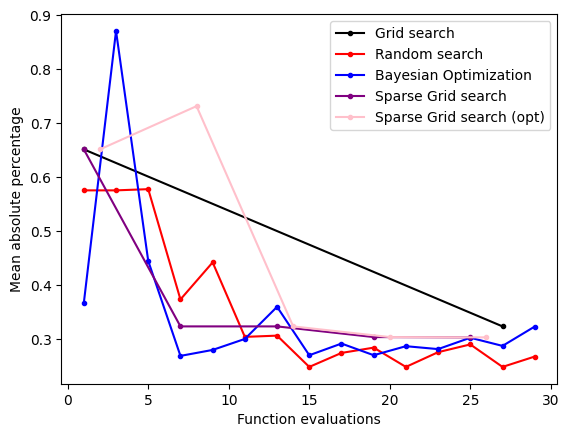

######################################################################################################################################################
Current Dataset: 2 of 5 with id: 359952
The average value for target is: tensor([50076.3906])
Min target: tensor([0.]) Max target: tensor([500001.])

################################################## Current Budget: 1 ##################################################

Performing grid search
Best score with Grid search: 0.9117116630077362

Performing random search
Best score with Random search: 0.3758488744497299

Performing bayesian optimization
Best score with Bayesian Optimization: 0.6672484576702118

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 4620ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.9117116630077362 optimized: 0.9117116630077362
[0.9117116630077362]
[0.3758488744497299]
[0.6672484576702118]
[0.91171

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.5319864600896835
[0.9117116630077362]
[0.3758488744497299, 0.3758488744497299]
[0.6672484576702118, 0.5319864600896835]
[0.9117116630077362]
[0.9117116630077362]

################################################## Current Budget: 5 ##################################################

Performing random search
Best score with Random search: 0.7512879967689514

Performing bayesian optimization
Best score with Bayesian Optimization: 0.6720473170280457
[0.9117116630077362]
[0.3758488744497299, 0.3758488744497299, 0.7512879967689514]
[0.6672484576702118, 0.5319864600896835, 0.6720473170280457]
[0.9117116630077362]
[0.9117116630077362]

################################################## Current Budget: 7 ##################################################

Performing random search
Best score with Random search: 0.5265324413776398

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.6888136267662048

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 34358ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.7247560024261475 optimized: 0.7052212953567505
[0.9117116630077362]
[0.3758488744497299, 0.3758488744497299, 0.7512879967689514, 0.5265324413776398]
[0.6672484576702118, 0.5319864600896835, 0.6720473170280457, 0.6888136267662048]
[0.9117116630077362, 0.7247560024261475]
[0.9117116630077362, 0.7052212953567505]

################################################## Current Budget: 9 ##################################################

Performing random search
Best score with Random search: 0.3758488744497299

Performing bayesian optimization
Best score with Bayesian Optimization: 0.3946167081594467
[0.9117116630077362]
[0.3758488744497299, 0.3758488744497299, 0.7512879967689514, 0.5265324413776398, 0.375848874449729

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.3978705555200577

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 63753ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.5996944159269333 optimized: 0.7052212953567505
[0.9117116630077362]
[0.3758488744497299, 0.3758488744497299, 0.7512879967689514, 0.5265324413776398, 0.3758488744497299, 0.4096937030553818, 0.6729782819747925]
[0.6672484576702118, 0.5319864600896835, 0.6720473170280457, 0.6888136267662048, 0.3946167081594467, 0.4480687528848648, 0.3978705555200577]
[0.9117116630077362, 0.7247560024261475, 0.5996944159269333]
[0.9117116630077362, 0.7052212953567505, 0.7052212953567505]

################################################## Current Budget: 15 ##################################################

Performing random search
Best score with Random search: 0.3758488744497299

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.4036722928285599
[0.9117116630077362]
[0.3758488744497299, 0.3758488744497299, 0.7512879967689514, 0.5265324413776398, 0.3758488744497299, 0.4096937030553818, 0.6729782819747925, 0.3758488744497299]
[0.6672484576702118, 0.5319864600896835, 0.6720473170280457, 0.6888136267662048, 0.3946167081594467, 0.4480687528848648, 0.3978705555200577, 0.4036722928285599]
[0.9117116630077362, 0.7247560024261475, 0.5996944159269333]
[0.9117116630077362, 0.7052212953567505, 0.7052212953567505]

################################################## Current Budget: 17 ##################################################

Performing random search
Best score with Random search: 0.3701009452342987

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.4055332541465759
[0.9117116630077362]
[0.3758488744497299, 0.3758488744497299, 0.7512879967689514, 0.5265324413776398, 0.3758488744497299, 0.4096937030553818, 0.6729782819747925, 0.3758488744497299, 0.3701009452342987]
[0.6672484576702118, 0.5319864600896835, 0.6720473170280457, 0.6888136267662048, 0.3946167081594467, 0.4480687528848648, 0.3978705555200577, 0.4036722928285599, 0.4055332541465759]
[0.9117116630077362, 0.7247560024261475, 0.5996944159269333]
[0.9117116630077362, 0.7052212953567505, 0.7052212953567505]

################################################## Current Budget: 19 ##################################################

Performing random search
Best score with Random search: 0.4251168668270111

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Best score with Bayesian Optimization: 0.41675956547260284

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 93062ms.
Solving linear system (automatic method)...
Done in 2ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.49251294136047363 optimized: 0.6529865860939026
[0.9117116630077362]
[0.3758488744497299, 0.3758488744497299, 0.7512879967689514, 0.5265324413776398, 0.3758488744497299, 0.4096937030553818, 0.6729782819747925, 0.3758488744497299, 0.3701009452342987, 0.4251168668270111]
[0.6672484576702118, 0.5319864600896835, 0.6720473170280457, 0.6888136267662048, 0.3946167081594467, 0.4480687528848648, 0.3978705555200577, 0.4036722928285599, 0.4055332541465759, 0.41675956547260284]
[0.9117116630077362, 0.7247560024261475, 0.5996944159269333, 0.49251294136047363]
[0.9117116630077362, 0.7052212953567505, 0.7052212953567505, 0.6529865860939026]

################################################## Current Budget: 21 #############

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Best score with Bayesian Optimization: 0.38536325097084045
[0.9117116630077362]
[0.3758488744497299, 0.3758488744497299, 0.7512879967689514, 0.5265324413776398, 0.3758488744497299, 0.4096937030553818, 0.6729782819747925, 0.3758488744497299, 0.3701009452342987, 0.4251168668270111, 0.3758488744497299, 0.3997691571712494]
[0.6672484576702118, 0.5319864600896835, 0.6720473170280457, 0.6888136267662048, 0.3946167081594467, 0.4480687528848648, 0.3978705555200577, 0.4036722928285599, 0.4055332541465759, 0.41675956547260284, 0.4106372445821762, 0.38536325097084045]
[0.9117116630077362, 0.7247560024261475, 0.5996944159269333, 0.49251294136047363]
[0.9117116630077362, 0.7052212953567505, 0.7052212953567505, 0.6529865860939026]

################################################## Current Budget: 25 ##################################################

Performing random search
Best score with Random search: 0.43963904678821564

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Best score with Bayesian Optimization: 0.3971060663461685

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 138269ms.
Solving linear system (automatic method)...
Done in 1ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.4282687902450557 optimized: 0.42826879024505615
[0.9117116630077362]
[0.3758488744497299, 0.3758488744497299, 0.7512879967689514, 0.5265324413776398, 0.3758488744497299, 0.4096937030553818, 0.6729782819747925, 0.3758488744497299, 0.3701009452342987, 0.4251168668270111, 0.3758488744497299, 0.3997691571712494, 0.43963904678821564]
[0.6672484576702118, 0.5319864600896835, 0.6720473170280457, 0.6888136267662048, 0.3946167081594467, 0.4480687528848648, 0.3978705555200577, 0.4036722928285599, 0.4055332541465759, 0.41675956547260284, 0.4106372445821762, 0.38536325097084045, 0.3971060663461685]
[0.9117116630077362, 0.7247560024261475, 0.5996944159269333, 0.49251294136047363, 0.4282687902450557]
[0.9117116630077362, 0.

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.3965437263250351
[0.9117116630077362, 0.5298008471727371]
[0.3758488744497299, 0.3758488744497299, 0.7512879967689514, 0.5265324413776398, 0.3758488744497299, 0.4096937030553818, 0.6729782819747925, 0.3758488744497299, 0.3701009452342987, 0.4251168668270111, 0.3758488744497299, 0.3997691571712494, 0.43963904678821564, 0.3758488744497299]
[0.6672484576702118, 0.5319864600896835, 0.6720473170280457, 0.6888136267662048, 0.3946167081594467, 0.4480687528848648, 0.3978705555200577, 0.4036722928285599, 0.4055332541465759, 0.41675956547260284, 0.4106372445821762, 0.38536325097084045, 0.3971060663461685, 0.3965437263250351]
[0.9117116630077362, 0.7247560024261475, 0.5996944159269333, 0.49251294136047363, 0.4282687902450557]
[0.9117116630077362, 0.7052212953567505, 0.7052212953567505, 0.6529865860939026, 0.42826879024505615]

################################################## Current Budget: 29 ##################################################

Performin

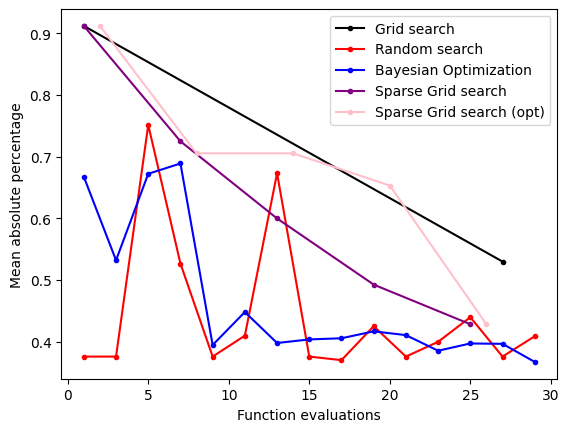

######################################################################################################################################################
Current Dataset: 3 of 5 with id: 359931
The average value for target is: tensor([15.0746])
Min target: tensor([12.5000]) Max target: tensor([17.5000])

################################################## Current Budget: 1 ##################################################

Performing grid search
Best score with Grid search: 0.044642310589551926

Performing random search
Best score with Random search: 0.045129429548978806

Performing bayesian optimization
Best score with Bayesian Optimization: 0.0459919236600399

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 1184ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.044642310589551926 optimized: 0.044642310589551926
[0.044642310589551926]
[0.045129429548978806]
[0.045991923660

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.04393545351922512
[0.044642310589551926]
[0.045129429548978806, 0.045129429548978806]
[0.0459919236600399, 0.04393545351922512]
[0.044642310589551926]
[0.044642310589551926]

################################################## Current Budget: 5 ##################################################

Performing random search
Best score with Random search: 0.04469851590692997

Performing bayesian optimization
Best score with Bayesian Optimization: 0.04395565204322338
[0.044642310589551926]
[0.045129429548978806, 0.045129429548978806, 0.04469851590692997]
[0.0459919236600399, 0.04393545351922512, 0.04395565204322338]
[0.044642310589551926]
[0.044642310589551926]

################################################## Current Budget: 7 ##################################################

Performing random search
Best score with Random search: 0.04316882975399494

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.043439120054244995

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 8265ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.04462821967899799 optimized: 0.04462807811796665
[0.044642310589551926]
[0.045129429548978806, 0.045129429548978806, 0.04469851590692997, 0.04316882975399494]
[0.0459919236600399, 0.04393545351922512, 0.04395565204322338, 0.043439120054244995]
[0.044642310589551926, 0.04462821967899799]
[0.044642310589551926, 0.04462807811796665]

################################################## Current Budget: 9 ##################################################

Performing random search
Best score with Random search: 0.045129429548978806

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.045950403437018394
[0.044642310589551926]
[0.045129429548978806, 0.045129429548978806, 0.04469851590692997, 0.04316882975399494, 0.045129429548978806]
[0.0459919236600399, 0.04393545351922512, 0.04395565204322338, 0.043439120054244995, 0.045950403437018394]
[0.044642310589551926, 0.04462821967899799]
[0.044642310589551926, 0.04462807811796665]

################################################## Current Budget: 11 ##################################################

Performing random search
Best score with Random search: 0.043360646814107895

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.043191393837332726
[0.044642310589551926]
[0.045129429548978806, 0.045129429548978806, 0.04469851590692997, 0.04316882975399494, 0.045129429548978806, 0.043360646814107895]
[0.0459919236600399, 0.04393545351922512, 0.04395565204322338, 0.043439120054244995, 0.045950403437018394, 0.043191393837332726]
[0.044642310589551926, 0.04462821967899799]
[0.044642310589551926, 0.04462807811796665]

################################################## Current Budget: 13 ##################################################

Performing random search
Best score with Random search: 0.04422542452812195

Performing bayesian optimization
Best score with Bayesian Optimization: 0.04326489008963108

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 16007ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.04462808929383755 optimized: 0.04462807811796665
[0.044

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.043831052258610725
[0.044642310589551926]
[0.045129429548978806, 0.045129429548978806, 0.04469851590692997, 0.04316882975399494, 0.045129429548978806, 0.043360646814107895, 0.04422542452812195, 0.044397709891200066]
[0.0459919236600399, 0.04393545351922512, 0.04395565204322338, 0.043439120054244995, 0.045950403437018394, 0.043191393837332726, 0.04326489008963108, 0.043831052258610725]
[0.044642310589551926, 0.04462821967899799, 0.04462808929383755]
[0.044642310589551926, 0.04462807811796665, 0.04462807811796665]

################################################## Current Budget: 17 ##################################################

Performing random search
Best score with Random search: 0.04411654733121395

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.044100064784288406
[0.044642310589551926]
[0.045129429548978806, 0.045129429548978806, 0.04469851590692997, 0.04316882975399494, 0.045129429548978806, 0.043360646814107895, 0.04422542452812195, 0.044397709891200066, 0.04411654733121395]
[0.0459919236600399, 0.04393545351922512, 0.04395565204322338, 0.043439120054244995, 0.045950403437018394, 0.043191393837332726, 0.04326489008963108, 0.043831052258610725, 0.044100064784288406]
[0.044642310589551926, 0.04462821967899799, 0.04462808929383755]
[0.044642310589551926, 0.04462807811796665, 0.04462807811796665]

################################################## Current Budget: 19 ##################################################

Performing random search
Best score with Random search: 0.0434161052107811

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Best score with Bayesian Optimization: 0.04375459812581539

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 23266ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.0446280799806118 optimized: 0.04462807811796665
[0.044642310589551926]
[0.045129429548978806, 0.045129429548978806, 0.04469851590692997, 0.04316882975399494, 0.045129429548978806, 0.043360646814107895, 0.04422542452812195, 0.044397709891200066, 0.04411654733121395, 0.0434161052107811]
[0.0459919236600399, 0.04393545351922512, 0.04395565204322338, 0.043439120054244995, 0.045950403437018394, 0.043191393837332726, 0.04326489008963108, 0.043831052258610725, 0.044100064784288406, 0.04375459812581539]
[0.044642310589551926, 0.04462821967899799, 0.04462808929383755, 0.0446280799806118]
[0.044642310589551926, 0.04462807811796665, 0.04462807811796665, 0.04462807811796665]

##############################################

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Best score with Bayesian Optimization: 0.04302048310637474
[0.044642310589551926]
[0.045129429548978806, 0.045129429548978806, 0.04469851590692997, 0.04316882975399494, 0.045129429548978806, 0.043360646814107895, 0.04422542452812195, 0.044397709891200066, 0.04411654733121395, 0.0434161052107811, 0.04304193891584873, 0.043613970279693604]
[0.0459919236600399, 0.04393545351922512, 0.04395565204322338, 0.043439120054244995, 0.045950403437018394, 0.043191393837332726, 0.04326489008963108, 0.043831052258610725, 0.044100064784288406, 0.04375459812581539, 0.04337652213871479, 0.04302048310637474]
[0.044642310589551926, 0.04462821967899799, 0.04462808929383755, 0.0446280799806118]
[0.044642310589551926, 0.04462807811796665, 0.04462807811796665, 0.04462807811796665]

################################################## Current Budget: 25 ##################################################

Performing random search
Best score with Random search: 0.043395159766077995

Performing bayesian optimizatio

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.04285535775125027
[0.044642310589551926, 0.04462813958525658]
[0.045129429548978806, 0.045129429548978806, 0.04469851590692997, 0.04316882975399494, 0.045129429548978806, 0.043360646814107895, 0.04422542452812195, 0.044397709891200066, 0.04411654733121395, 0.0434161052107811, 0.04304193891584873, 0.043613970279693604, 0.043395159766077995, 0.04304193891584873]
[0.0459919236600399, 0.04393545351922512, 0.04395565204322338, 0.043439120054244995, 0.045950403437018394, 0.043191393837332726, 0.04326489008963108, 0.043831052258610725, 0.044100064784288406, 0.04375459812581539, 0.04337652213871479, 0.04302048310637474, 0.043113892897963524, 0.04285535775125027]
[0.044642310589551926, 0.04462821967899799, 0.04462808929383755, 0.0446280799806118, 0.0446280762553215]
[0.044642310589551926, 0.04462807811796665, 0.04462807811796665, 0.04462807811796665, 0.04462807811796665]

################################################## Current Budget: 29 #############

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.04379684291779995
[0.044642310589551926, 0.04462813958525658]
[0.045129429548978806, 0.045129429548978806, 0.04469851590692997, 0.04316882975399494, 0.045129429548978806, 0.043360646814107895, 0.04422542452812195, 0.044397709891200066, 0.04411654733121395, 0.0434161052107811, 0.04304193891584873, 0.043613970279693604, 0.043395159766077995, 0.04304193891584873, 0.04261070303618908]
[0.0459919236600399, 0.04393545351922512, 0.04395565204322338, 0.043439120054244995, 0.045950403437018394, 0.043191393837332726, 0.04326489008963108, 0.043831052258610725, 0.044100064784288406, 0.04375459812581539, 0.04337652213871479, 0.04302048310637474, 0.043113892897963524, 0.04285535775125027, 0.04379684291779995]
[0.044642310589551926, 0.04462821967899799, 0.04462808929383755, 0.0446280799806118, 0.0446280762553215]
[0.044642310589551926, 0.04462807811796665, 0.04462807811796665, 0.04462807811796665, 0.04462807811796665]
[1, 7, 13, 19, 25]
[2, 8, 14, 20, 26]
####

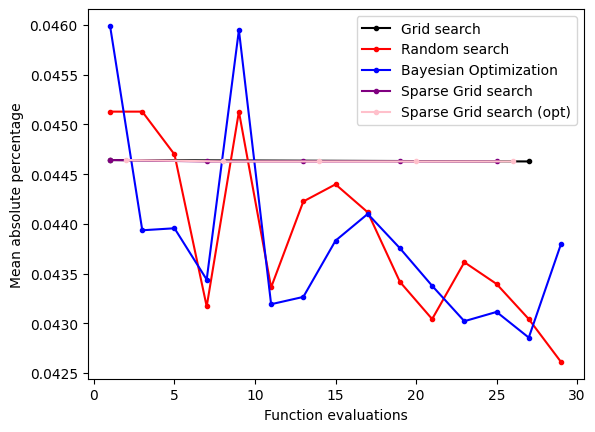

######################################################################################################################################################
Current Dataset: 4 of 5 with id: 359949
The average value for target is: tensor([540084.6250])
Min target: tensor([75000.]) Max target: tensor([7700000.])

################################################## Current Budget: 1 ##################################################

Performing grid search
Best score with Grid search: 0.39926087856292725

Performing random search
Best score with Random search: 0.14899466931819916

Performing bayesian optimization
Best score with Bayesian Optimization: 0.13753961771726608

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 4612ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.39926087856292725 optimized: 0.39926087856292725
[0.39926087856292725]
[0.14899466931819916]
[0.1375396177172

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.17723557353019714
[0.39926087856292725]
[0.14899466931819916, 0.14899466931819916]
[0.13753961771726608, 0.17723557353019714]
[0.39926087856292725]
[0.39926087856292725]

################################################## Current Budget: 5 ##################################################

Performing random search
Best score with Random search: 0.2056763842701912

Performing bayesian optimization
Best score with Bayesian Optimization: 0.14663489907979965
[0.39926087856292725]
[0.14899466931819916, 0.14899466931819916, 0.2056763842701912]
[0.13753961771726608, 0.17723557353019714, 0.14663489907979965]
[0.39926087856292725]
[0.39926087856292725]

################################################## Current Budget: 7 ##################################################

Performing random search
Best score with Random search: 0.14538730680942535

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.1554362252354622

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 34289ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.15441271662712097 optimized: 0.30821265280246735
[0.39926087856292725]
[0.14899466931819916, 0.14899466931819916, 0.2056763842701912, 0.14538730680942535]
[0.13753961771726608, 0.17723557353019714, 0.14663489907979965, 0.1554362252354622]
[0.39926087856292725, 0.15441271662712097]
[0.39926087856292725, 0.30821265280246735]

################################################## Current Budget: 9 ##################################################

Performing random search
Best score with Random search: 0.13905049115419388

Performing bayesian optimization
Best score with Bayesian Optimization: 0.1377033069729805
[0.39926087856292725]
[0.14899466931819916, 0.14899466931819916, 0.2056763842701912, 0.14538730680942535,

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.15203843265771866

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 64763ms.
Solving linear system (automatic method)...
Done in 1ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.14020904153585434 optimized: 0.14020904153585434
[0.39926087856292725]
[0.14899466931819916, 0.14899466931819916, 0.2056763842701912, 0.14538730680942535, 0.13905049115419388, 0.14596042037010193, 0.14293218404054642]
[0.13753961771726608, 0.17723557353019714, 0.14663489907979965, 0.1554362252354622, 0.1377033069729805, 0.153716541826725, 0.15203843265771866]
[0.39926087856292725, 0.15441271662712097, 0.14020904153585434]
[0.39926087856292725, 0.30821265280246735, 0.14020904153585434]

################################################## Current Budget: 15 ##################################################

Performing random search
Best score with Random search: 0.13905049115419388

Performing bayesian optimizat

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.1374332159757614

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 110659ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.13814949989318845 optimized: 0.13814949989318848
[0.39926087856292725]
[0.14899466931819916, 0.14899466931819916, 0.2056763842701912, 0.14538730680942535, 0.13905049115419388, 0.14596042037010193, 0.14293218404054642, 0.13905049115419388, 0.14053411036729813, 0.14269843697547913]
[0.13753961771726608, 0.17723557353019714, 0.14663489907979965, 0.1554362252354622, 0.1377033069729805, 0.153716541826725, 0.15203843265771866, 0.1467263028025627, 0.14108151197433472, 0.1374332159757614]
[0.39926087856292725, 0.15441271662712097, 0.14020904153585434, 0.13814949989318845]
[0.39926087856292725, 0.30821265280246735, 0.14020904153585434, 0.13814949989318848]

################################################## Current Bud

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.13790514320135117
[0.39926087856292725]
[0.14899466931819916, 0.14899466931819916, 0.2056763842701912, 0.14538730680942535, 0.13905049115419388, 0.14596042037010193, 0.14293218404054642, 0.13905049115419388, 0.14053411036729813, 0.14269843697547913, 0.1361483335494995, 0.14022668451070786]
[0.13753961771726608, 0.17723557353019714, 0.14663489907979965, 0.1554362252354622, 0.1377033069729805, 0.153716541826725, 0.15203843265771866, 0.1467263028025627, 0.14108151197433472, 0.1374332159757614, 0.13855639100074768, 0.13790514320135117]
[0.39926087856292725, 0.15441271662712097, 0.14020904153585434, 0.13814949989318845]
[0.39926087856292725, 0.30821265280246735, 0.14020904153585434, 0.13814949989318848]

################################################## Current Budget: 25 ##################################################

Performing random search
Best score with Random search: 0.1394052878022194

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.14622178673744202

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 187005ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.1372393444180489 optimized: 0.13723934441804886
[0.39926087856292725]
[0.14899466931819916, 0.14899466931819916, 0.2056763842701912, 0.14538730680942535, 0.13905049115419388, 0.14596042037010193, 0.14293218404054642, 0.13905049115419388, 0.14053411036729813, 0.14269843697547913, 0.1361483335494995, 0.14022668451070786, 0.1394052878022194]
[0.13753961771726608, 0.17723557353019714, 0.14663489907979965, 0.1554362252354622, 0.1377033069729805, 0.153716541826725, 0.15203843265771866, 0.1467263028025627, 0.14108151197433472, 0.1374332159757614, 0.13855639100074768, 0.13790514320135117, 0.14622178673744202]
[0.39926087856292725, 0.15441271662712097, 0.14020904153585434, 0.13814949989318845, 0.1372393444180489]
[0.3

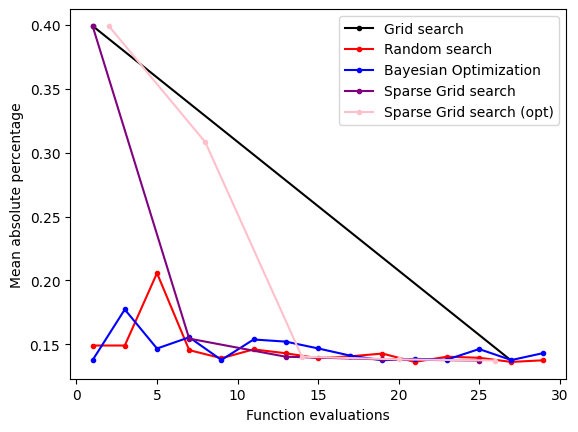

######################################################################################################################################################
Current Dataset: 5 of 5 with id: 359938
The average value for target is: tensor([5490.4849])
Min target: tensor([499.]) Max target: tensor([1120000.])

################################################## Current Budget: 1 ##################################################

Performing grid search
Best score with Grid search: 4.275510907173157

Performing random search
Best score with Random search: 1.5257356390357018

Performing bayesian optimization
Best score with Bayesian Optimization: 0.14716311544179916

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 2851ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 4.275510907173157 optimized: 4.275510907173157
[4.275510907173157]
[1.5257356390357018]
[0.14716311544179916]
[4.27551

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.6282378435134888
[4.275510907173157]
[1.5257356390357018, 1.5257356390357018]
[0.14716311544179916, 0.6282378435134888]
[4.275510907173157]
[4.275510907173157]

################################################## Current Budget: 5 ##################################################

Performing random search
Best score with Random search: 1.0597690641880035

Performing bayesian optimization
Best score with Bayesian Optimization: 0.39080195128917694
[4.275510907173157]
[1.5257356390357018, 1.5257356390357018, 1.0597690641880035]
[0.14716311544179916, 0.6282378435134888, 0.39080195128917694]
[4.275510907173157]
[4.275510907173157]

################################################## Current Budget: 7 ##################################################

Performing random search
Best score with Random search: 0.1629129946231842

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.09170049801468849

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 20523ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.25493448227643967 optimized: 0.5442098081111908
[4.275510907173157]
[1.5257356390357018, 1.5257356390357018, 1.0597690641880035, 0.1629129946231842]
[0.14716311544179916, 0.6282378435134888, 0.39080195128917694, 0.09170049801468849]
[4.275510907173157, 0.25493448227643967]
[4.275510907173157, 0.5442098081111908]

################################################## Current Budget: 9 ##################################################

Performing random search
Best score with Random search: 0.12209410220384598

Performing bayesian optimization
Best score with Bayesian Optimization: 0.08352114632725716
[4.275510907173157]
[1.5257356390357018, 1.5257356390357018, 1.0597690641880035, 0.1629129946231842, 0.12209410220

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Best score with Bayesian Optimization: 0.06403001397848129

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 39359ms.
Solving linear system (automatic method)...
Done in 1ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.09532517194747925 optimized: 0.5442098081111908
[4.275510907173157]
[1.5257356390357018, 1.5257356390357018, 1.0597690641880035, 0.1629129946231842, 0.12209410220384598, 0.07769007608294487, 0.17224227637052536]
[0.14716311544179916, 0.6282378435134888, 0.39080195128917694, 0.09170049801468849, 0.08352114632725716, 0.3845748007297516, 0.06403001397848129]
[4.275510907173157, 0.25493448227643967, 0.09532517194747925]
[4.275510907173157, 0.5442098081111908, 0.5442098081111908]

################################################## Current Budget: 15 ##################################################

Performing random search
Best score with Random search: 0.12209410220384598

Performing bayesian optimization
Best s

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best score with Bayesian Optimization: 0.07555047050118446

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 58564ms.
Solving linear system (automatic method)...
Done in 1ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.06619121320545651 optimized: 0.06619121320545673
[4.275510907173157]
[1.5257356390357018, 1.5257356390357018, 1.0597690641880035, 0.1629129946231842, 0.12209410220384598, 0.07769007608294487, 0.17224227637052536, 0.12209410220384598, 0.15332912653684616, 0.07589912414550781]
[0.14716311544179916, 0.6282378435134888, 0.39080195128917694, 0.09170049801468849, 0.08352114632725716, 0.3845748007297516, 0.06403001397848129, 0.09721609205007553, 0.09460436925292015, 0.07555047050118446]
[4.275510907173157, 0.25493448227643967, 0.09532517194747925, 0.06619121320545651]
[4.275510907173157, 0.5442098081111908, 0.5442098081111908, 0.06619121320545673]

################################################## Current Budget: 21

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Best score with Bayesian Optimization: 0.2141532227396965
[4.275510907173157]
[1.5257356390357018, 1.5257356390357018, 1.0597690641880035, 0.1629129946231842, 0.12209410220384598, 0.07769007608294487, 0.17224227637052536, 0.12209410220384598, 0.15332912653684616, 0.07589912414550781, 0.12209410220384598, 0.09708681330084801]
[0.14716311544179916, 0.6282378435134888, 0.39080195128917694, 0.09170049801468849, 0.08352114632725716, 0.3845748007297516, 0.06403001397848129, 0.09721609205007553, 0.09460436925292015, 0.07555047050118446, 0.10121709108352661, 0.2141532227396965]
[4.275510907173157, 0.25493448227643967, 0.09532517194747925, 0.06619121320545651]
[4.275510907173157, 0.5442098081111908, 0.5442098081111908, 0.06619121320545673]

################################################## Current Budget: 25 ##################################################

Performing random search
Best score with Random search: 0.07812056690454483

Performing bayesian optimization


/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Best score with Bayesian Optimization: 0.08052974939346313

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 82365ms.
Solving linear system (automatic method)...
Done in 0ms.
Optimizing (gradient descent)...
Done in 0ms.
Best score with Sparse Search: 0.04419752769172447 optimized: 0.044197527691721916
[4.275510907173157]
[1.5257356390357018, 1.5257356390357018, 1.0597690641880035, 0.1629129946231842, 0.12209410220384598, 0.07769007608294487, 0.17224227637052536, 0.12209410220384598, 0.15332912653684616, 0.07589912414550781, 0.12209410220384598, 0.09708681330084801, 0.07812056690454483]
[0.14716311544179916, 0.6282378435134888, 0.39080195128917694, 0.09170049801468849, 0.08352114632725716, 0.3845748007297516, 0.06403001397848129, 0.09721609205007553, 0.09460436925292015, 0.07555047050118446, 0.10121709108352661, 0.2141532227396965, 0.08052974939346313]
[4.275510907173157, 0.25493448227643967, 0.09532517194747925, 0.06619121320545651, 0.04419752769172447]
[4.2

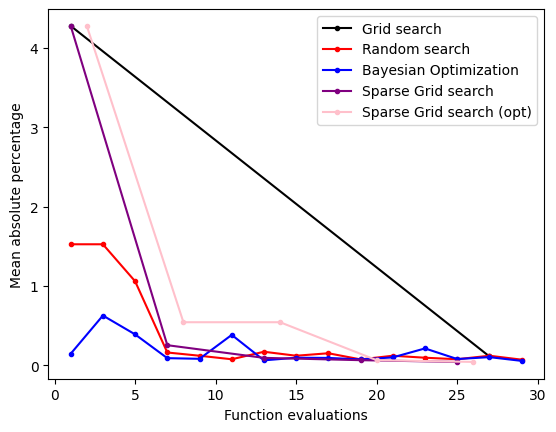

In [4]:
ids = [233211, 359952, 359931, 359949, 359938]
# [359940, 317614, 359934, 359946, 359932, 233214, 359943]

for i in range(len(ids)):
    print("######################################################################################################################################################")
    print("Current Dataset:", (i+1), "of", len(ids), "with id:", ids[i])

    dataset = HPO.Dataset(task_id=ids[i])

    print("The average value for target is:", sum(
        dataset.get_Y()/len(dataset.get_Y())))
    print("Min target:", min(dataset.get_Y()),
          "Max target:", max(dataset.get_Y()))

    current_dataset_grid = []
    current_dataset_random = []
    current_dataset_bayesian = []
    current_dataset_sparse = []
    current_dataset_sparse_opt = []

    current_dataset_grid_cost = []
    current_dataset_random_cost = []
    current_dataset_bayesian_cost = []
    current_dataset_sparse_cost = []
    current_dataset_sparse_opt_cost = []

    ################## MODEL AND FUNCTION DEFINITION ####################

    def evaluate_model(epochs, batch_size, learning_rate, number_of_layers, neurons_per_layer, deterministic=True):

        # return epochs + batch_size + learning_rate + number_of_layers + neurons_per_layer

        kfold = KFold(n_splits=CV)

        split = (kfold.split(dataset.get_X(), dataset.get_Y()))

        values = []

        numeric_features = [not x for x in dataset.get_categorical_indicator()]
        numeric_transformer = Pipeline(
            steps=[("imputer", SimpleImputer(strategy="median")),
                   ("scaler", StandardScaler())]
        )

        categorical_transformer = Pipeline(
            steps=[
                ("encoder", OneHotEncoder(
                    handle_unknown="infrequent_if_exist", sparse_output=False)),
                # ("selector", SelectPercentile(chi2, percentile=50)),
            ]
        )

        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numeric_features),
                ("cat", categorical_transformer,
                 dataset.get_categorical_indicator()),
            ]
        )

        for i, (train_index, test_index) in enumerate(split):

            if deterministic:
                reset_seeds()

            X_train = dataset.get_X()[train_index]
            Y_train = dataset.get_Y()[train_index]

            X_val = dataset.get_X()[test_index]
            Y_val = dataset.get_Y()[test_index]

            preprocessor.fit(X_train, Y_train)

            X_train = preprocessor.transform(X_train)
            X_val = preprocessor.transform(X_val)

            regressor = KerasRegressor(model=create_model,
                                       learning_rate=learning_rate,
                                       input_dim=len(
                                           X_train[0]),
                                       number_layers=number_of_layers,
                                       neurons_per_layer=neurons_per_layer,
                                       verbose=0)

            regressor = TransformedTargetRegressor(regressor=regressor,
                                                   transformer=StandardScaler())

            regressor.fit(X_train, Y_train, epochs=epochs,
                          batch_size=batch_size, shuffle=False)

            Y_predicted = regressor.predict(X_val)
            # error = sklearn.metrics.mean_absolute_error(Y_predicted, Y_val)
            error = sklearn.metrics.mean_absolute_percentage_error(
                Y_predicted, Y_val)
            values.append(error)

            del regressor
            K.clear_session()

        result = sum(values)/len(values)
        return result

    def blackboxfunction_grid(params):
        # index = int(params[0]*(len(hyperparameterspace_special["loss"])-1))
        # hyperparameterspace_special["loss"][index]

        epochs = int(params[0])

        batch_size = int(params[1])

        learning_rate = params[2]

        number_of_layers = 1  # int(params[3])

        neurons_per_layer = 40  # int(params[4])

        return evaluate_model(epochs, batch_size, learning_rate, number_of_layers, neurons_per_layer)

    def blackboxfunction_random(params):
        # index = int(params[0]*(len(hyperparameterspace_special["loss"])-1))
        # hyperparameterspace_special["loss"][index]

        epochs = int(params[0])

        batch_size = int(params[1])

        learning_rate = params[2]

        number_of_layers = 1  # int(params[3])

        neurons_per_layer = 40  # int(params[4])

        return evaluate_model(epochs, batch_size, learning_rate, number_of_layers, neurons_per_layer, deterministic=False)

    def blackboxfunction_bayesian(params):
        # index = int(params[0]*(len(hyperparameterspace_special["loss"])-1))
        # hyperparameterspace_special["loss"][index]

        epochs = int(params[0])

        batch_size = int(params[1])

        model_learning_rate = 10 ** (params[2])

        number_of_layers = 1  # int(params[3])

        neurons_per_layer = 40  # int(params[4])

        return evaluate_model(epochs, batch_size, model_learning_rate, number_of_layers, neurons_per_layer, deterministic=False)

    ##################### Function for sparse grid search #####################

    class ExampleFunction(pysgpp.ScalarFunction):

        def __init__(self):
            super(ExampleFunction, self).__init__(
                len(hyperparameterspace.keys()))

        def eval(self, x):
            # index = int(x[0]*(len(hyperparameterspace_special["loss"])-1))
            # hyperparameterspace_special["loss"][index]

            epochs = int(HPO.from_standard(
                hyperparameterspace_special["epochs"][0], hyperparameterspace_special["epochs"][1], x[0]))

            batch_size = int(HPO.from_standard(
                hyperparameterspace_special["batch_size"][0], hyperparameterspace_special["batch_size"][1], x[1]))

            model_learning_rate = HPO.from_standard_log(hyperparameterspace_special["learning_rate"][
                                                        0], hyperparameterspace_special["learning_rate"][1], x[2])

            number_of_layers = 1  # int(HPO.from_standard(
            # hyperparameterspace_special["number_layers"][0], hyperparameterspace_special["number_layers"][1], x[3]))

            neurons_per_layer = 40  # int(HPO.from_standard(
            # hyperparameterspace_special["neurons_per_layer"][0], hyperparameterspace_special["neurons_per_layer"][1], x[4]))

            return evaluate_model(epochs, batch_size, model_learning_rate, number_of_layers, neurons_per_layer)

    ##### For each dataset: run models with different budget #####
    BUDGET = 1
    for j in range(ITER):
        
        BUDGET = (j * 2) + 1

        #if not (j == 0):
        #    BUDGET = BUDGET + 2 * len(hyperparameterspace.keys())

        print("\n################################################## Current Budget:",
              BUDGET, "##################################################")

        ############################## GRID SEARCH #######################
        grid_sizes = [x ** len(hyperparameterspace) for x in range(9)]
        if BUDGET in grid_sizes:
            print("\nPerforming grid search")
            optimization = HPO.GridSearchOptimization(
                dataset, blackboxfunction_grid, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, cv=CV)

            result, cost = optimization.fit()

            index_best = 0
            for m in range(len(result)):
                if result[m][1] < result[index_best][1]:
                    index_best = m

            best_score = result[index_best][1]
            best_params = result[index_best][0]

            if VERBOSE > 0:
                print("With Hyperparameters: ")
                m = 0
                for key in hyperparameterspace.keys():
                    if hyperparameterspace[key][0] == "list":
                        index = int(
                            best_params[m]*(len(hyperparameterspace_special[key])-1))
                        print(key + ": " +
                              str(hyperparameterspace_special[key][index]))
                    else:
                        print(key + ": " + str(best_params[m]))
                    m += 1

            print("Best score with Grid search:", best_score)

            current_dataset_grid.append(best_score)
            current_dataset_grid_cost.append(cost)

            K.clear_session()

        # ########################### RANDOM SEARCH #######################
        print("\nPerforming random search")

        optimization = HPO.RandomSearchOptimization(
            dataset, blackboxfunction_random, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, cv=CV)

        result, cost = optimization.fit()

        index_best = 0
        for m in range(len(result)):
            if result[m][1] < result[index_best][1]:
                index_best = m

        best_score = result[index_best][1]
        best_params = result[index_best][0]

        if VERBOSE > 0:
            print("With Hyperparameters: ")
            m = 0
            for key in hyperparameterspace.keys():
                if hyperparameterspace[key][0] == "list":
                    index = int(
                        best_params[m]*(len(hyperparameterspace_special[key])-1))
                    print(key + ": " +
                          str(hyperparameterspace_special[key][index]))
                else:
                    print(key + ": " + str(best_params[m]))
                m += 1

        print("Best score with Random search:", best_score)

        current_dataset_random.append(best_score)
        current_dataset_random_cost.append(cost)

        K.clear_session()

        ########################### BAYESIAN OPT #####################
        print("\nPerforming bayesian optimization")

        optimization = HPO.BayesianOptimization(
            dataset, blackboxfunction_bayesian, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE)

        result, cost = optimization.fit()

        index_best = 0
        for m in range(len(result)):
            if result[m][1] < result[index_best][1]:
                index_best = m

        best_score = result[index_best][1]
        best_params = result[index_best][0]

        if VERBOSE > 0:
            print("With Hyperparameters: ")
            m = 0
            for key in hyperparameterspace.keys():
                if hyperparameterspace[key][0] == "list":
                    index = int(
                        best_params[m]*(len(hyperparameterspace_special[key])-1))
                    print(key + ": " +
                          str(hyperparameterspace_special[key][index]))
                elif hyperparameterspace[key][0] == "interval-log":
                    print(key + ": " + str(10 ** best_params[m]))
                else:
                    print(key + ": " + str(best_params[m]))
                m += 1

        print("Best score with Bayesian Optimization:", best_score)

        current_dataset_bayesian.append(best_score)
        current_dataset_bayesian_cost.append(BUDGET)

        K.clear_session()

        ########################### SPARSE OPT ############################

        costs_sparse = [1]
        for _ in range(40):
            costs_sparse.append(costs_sparse[-1]+2*len(hyperparameterspace))

        if BUDGET in costs_sparse:
            print("\nPerforming sparse search")

            f = ExampleFunction()

            optimization = HPO.SparseGridSearchOptimization(
                dataset, f, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, degree=2, adaptivity=0.5, optimizer="gradient_descent")

            result = optimization.fit()

            print("Best score with Sparse Search:",
                  result[0][1], "optimized:", result[0][3])

            current_dataset_sparse.append(result[0][1])
            current_dataset_sparse_opt.append(result[0][3])

            current_dataset_sparse_cost.append(result[1])
            current_dataset_sparse_opt_cost.append(result[1]+1)

            K.clear_session()

        print(current_dataset_grid)
        print(current_dataset_random)
        print(current_dataset_bayesian)
        print(current_dataset_sparse)
        print(current_dataset_sparse_opt)

    GRID_RESULT.append(current_dataset_grid)
    RANDOM_RESULT.append(current_dataset_random)
    BAYESIAN_RESULT.append(current_dataset_bayesian)
    SPARSE_RESULT.append(current_dataset_sparse)
    SPARSE_RESULT_OPTIMIZED.append(current_dataset_sparse_opt)

    GRID_COST.append(current_dataset_grid_cost)
    RANDOM_COST.append(current_dataset_random_cost)
    BAYESIAN_COST.append(current_dataset_bayesian_cost)
    SPARSE_COST.append(current_dataset_sparse_cost)
    print(current_dataset_sparse_cost)
    print(current_dataset_sparse_opt_cost)
    SPARSE_COST_OPTIMIZED.append(current_dataset_sparse_opt_cost)

    print("###################### Current dataset",
          ids[i], "######################")

    dataset = HPO.Dataset(task_id=ids[i])

    print("Target average:", sum(
        dataset.get_Y()/len(dataset.get_Y())))
    print("Min target:", min(dataset.get_Y()),
          "Max target:", max(dataset.get_Y()))

    # plotting the points
    plt.plot(GRID_COST[i], GRID_RESULT[i], '.-',
             color='black', label="Grid search")
    plt.plot(RANDOM_COST[i], RANDOM_RESULT[i], '.-',
             color='red', label="Random search")
    plt.plot(BAYESIAN_COST[i], BAYESIAN_RESULT[i], '.-',
             color='blue', label="Bayesian Optimization")
    plt.plot(SPARSE_COST[i], SPARSE_RESULT[i], '.-',
             color='purple', label="Sparse Grid search")
    plt.plot(SPARSE_COST_OPTIMIZED[i], SPARSE_RESULT_OPTIMIZED[i],
             '.-', color='pink', label="Sparse Grid search (opt)")

    # naming the x axis
    plt.xlabel('Function evaluations')
    # naming the y axis
    plt.ylabel('Mean absolute percentage')

    # show a legend on the plot
    plt.legend()
    plt.savefig("Current_tests/task_id"+str(ids[i]))
    # function to show the plot
    plt.show()


### Print lines

###################### Current dataset 233211 ######################
Target average: tensor([3932.8892])
Min target: tensor([326.]) Max target: tensor([18823.])


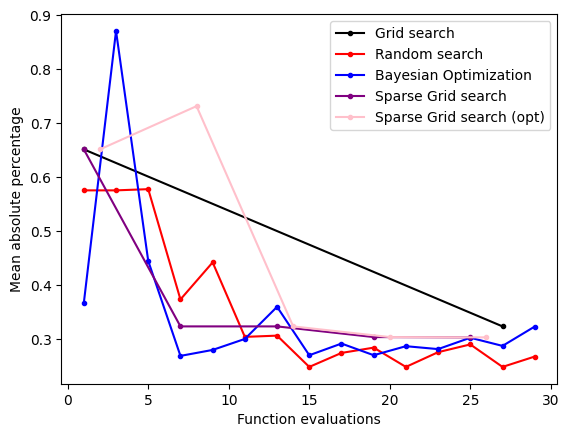

###################### Current dataset 359952 ######################
Target average: tensor([50076.3906])
Min target: tensor([0.]) Max target: tensor([500001.])


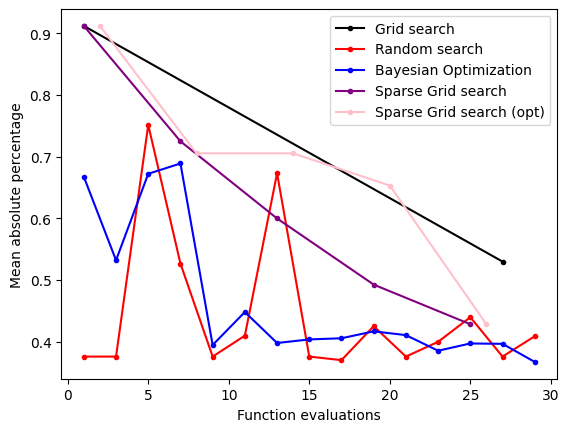

###################### Current dataset 359931 ######################
Target average: tensor([15.0746])
Min target: tensor([12.5000]) Max target: tensor([17.5000])


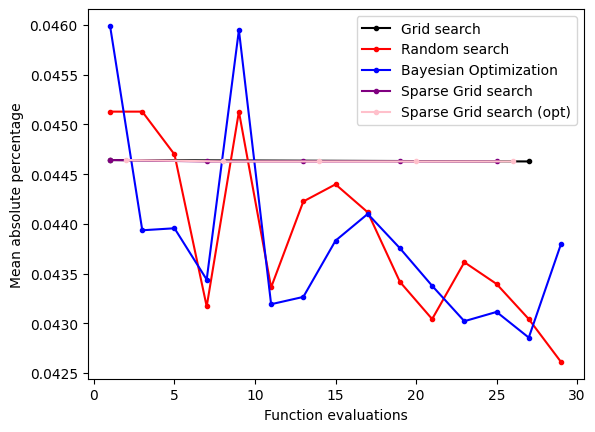

###################### Current dataset 359949 ######################
Target average: tensor([540084.6250])
Min target: tensor([75000.]) Max target: tensor([7700000.])


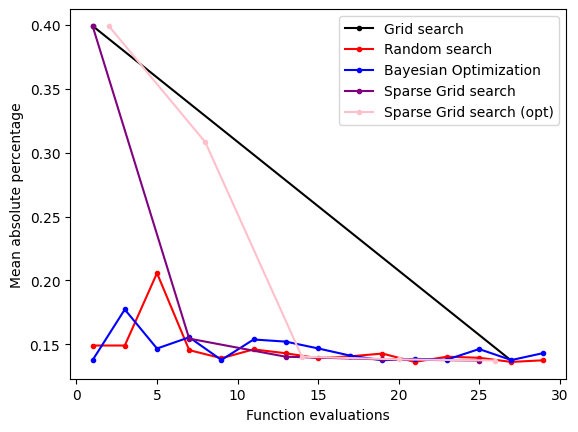

###################### Current dataset 359938 ######################
Target average: tensor([5490.4849])
Min target: tensor([499.]) Max target: tensor([1120000.])


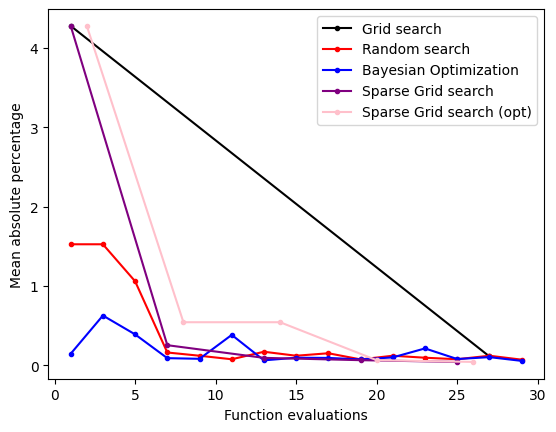

In [5]:
for i in range(len(ids)):
    print("###################### Current dataset", ids[i], "######################")
    
    dataset = HPO.Dataset(task_id=ids[i])
    
    print("Target average:", sum(
        dataset.get_Y()/len(dataset.get_Y())))
    print("Min target:", min(dataset.get_Y()),
          "Max target:", max(dataset.get_Y()))


    # plotting the points 
    plt.plot(GRID_COST[i], GRID_RESULT[i], '.-', color='black', label="Grid search")
    plt.plot(RANDOM_COST[i], RANDOM_RESULT[i], '.-', color='red', label="Random search")
    plt.plot(BAYESIAN_COST[i], BAYESIAN_RESULT[i], '.-', color='blue', label="Bayesian Optimization")
    plt.plot(SPARSE_COST[i], SPARSE_RESULT[i], '.-', color='purple', label="Sparse Grid search")
    plt.plot(SPARSE_COST_OPTIMIZED[i], SPARSE_RESULT_OPTIMIZED[i], '.-', color='pink', label="Sparse Grid search (opt)")
    
    # naming the x axis
    plt.xlabel('Function evaluations')
    # naming the y axis
    plt.ylabel('Mean absolute percentage')
    
    # show a legend on the plot
    plt.legend()
    
    # function to show the plot
    plt.show()